In [6]:
import sys
import os
root = os.path.abspath(os.getcwd())
path_data = root + "/data_paper/"
path_figures = root + "/figures_paper/"

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib import rc
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

from Topo_LR_Kitaev_AAH.Hamiltonians import *
from Topo_LR_Kitaev_AAH.Winding_num import *

fs = 50
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':30}) 
rc('text', usetex=True)

# ENERGY SPECTRUM

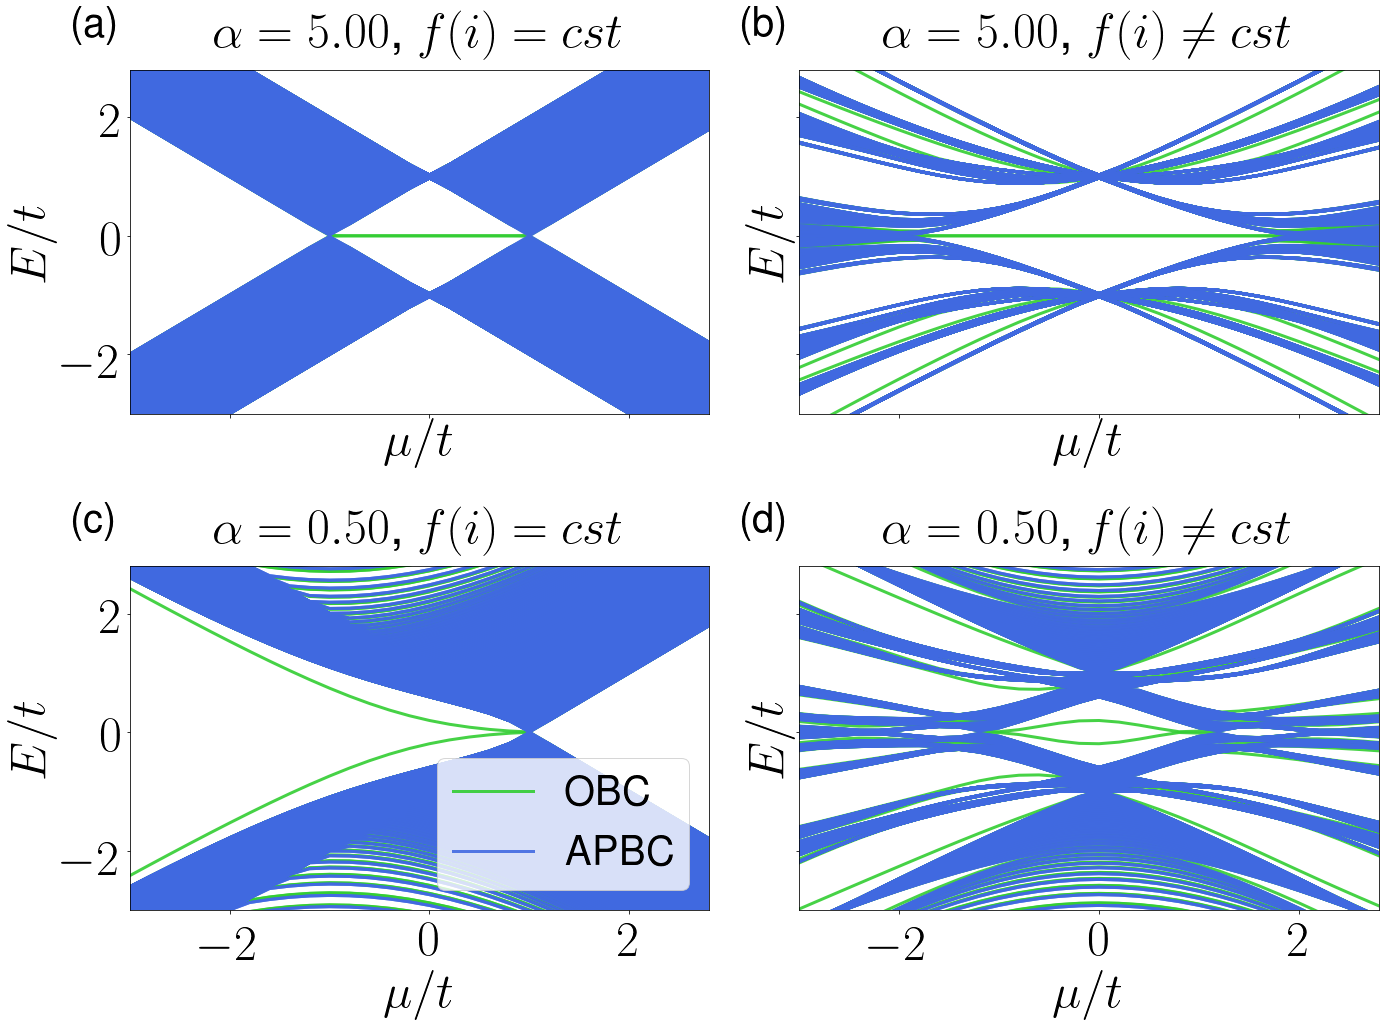

In [10]:
it = 12
L = 1
Fn1, Fn = Fibonacci(it)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20,15))
j = 0

for alpha in [5,0.5]:
    for constant in [True,False]:
               
        ax = axes.flat[j]
        j +=1
        ax.set_ylabel(r'$E/t$', fontsize=fs)
        ax.set_xlabel(r'$\mu/t$', fontsize=fs)
        plt.grid(axis='both')
        
        if constant == True:
            ax.set_title(r'$\alpha = %.2f$, $f(i) =  cst$' %(alpha), fontsize = fs, y = 1.05)
        else:
            ax.set_title(r'$\alpha = %.2f$, $f(i) \neq cst$' %(alpha), fontsize = fs, y = 1.05)
            
        params = dict(
            alpha = alpha,
            delta = 1/2,
            t = -1,
            Fn1 = Fn1,
            Fn = Fn,
            phase = 0,
            constant= constant
        )

        mu_list = np.arange(-3,3,0.2)
        energies_o = np.load(path_data + 'energies_OBC_alpha_%.2f_constant_%s_it_%.0f_L_%.0f.npy' %(alpha, str(constant), it, L))
        energies_r = np.load(path_data + 'energies_APBC_alpha_%.2f_constant_%s_it_%.0f_L_%.0f.npy' %(alpha, str(constant), it, L))
    
        my_labels = {"1" : "APBC", "2" : "OBC"}

        for energy in energies_o:
            ax.plot(mu_list, energy, color='limegreen', linestyle='-', linewidth=3, alpha=0.9, 
                     label=my_labels["2"])
            my_labels["2"] = "_nolegend_"
            
        for energy in energies_r:
            ax.plot(mu_list, energy, color='royalblue', linestyle='-', linewidth = 3, alpha=0.9, 
                     label=my_labels["1"])
            my_labels["1"] = "_nolegend_"

        ax.set_ylim(-3,2.8)
        ax.set_xlim(-3,2.8)

for ax,lab in zip(axes.flat, ['(a)', '(b)', '(c)', '(d)']):
    if lab == '(c)':
        ax.legend(fontsize=fs-10, loc='lower right')
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold',family='STIXGeneral')
    
plt.tight_layout()       
plt.savefig(path_figures + 'energy_spectrum.pdf')

# WINDING NUMBER

alpha:  5
constant:  True
constant:  False
alpha:  0.5
constant:  True
constant:  False


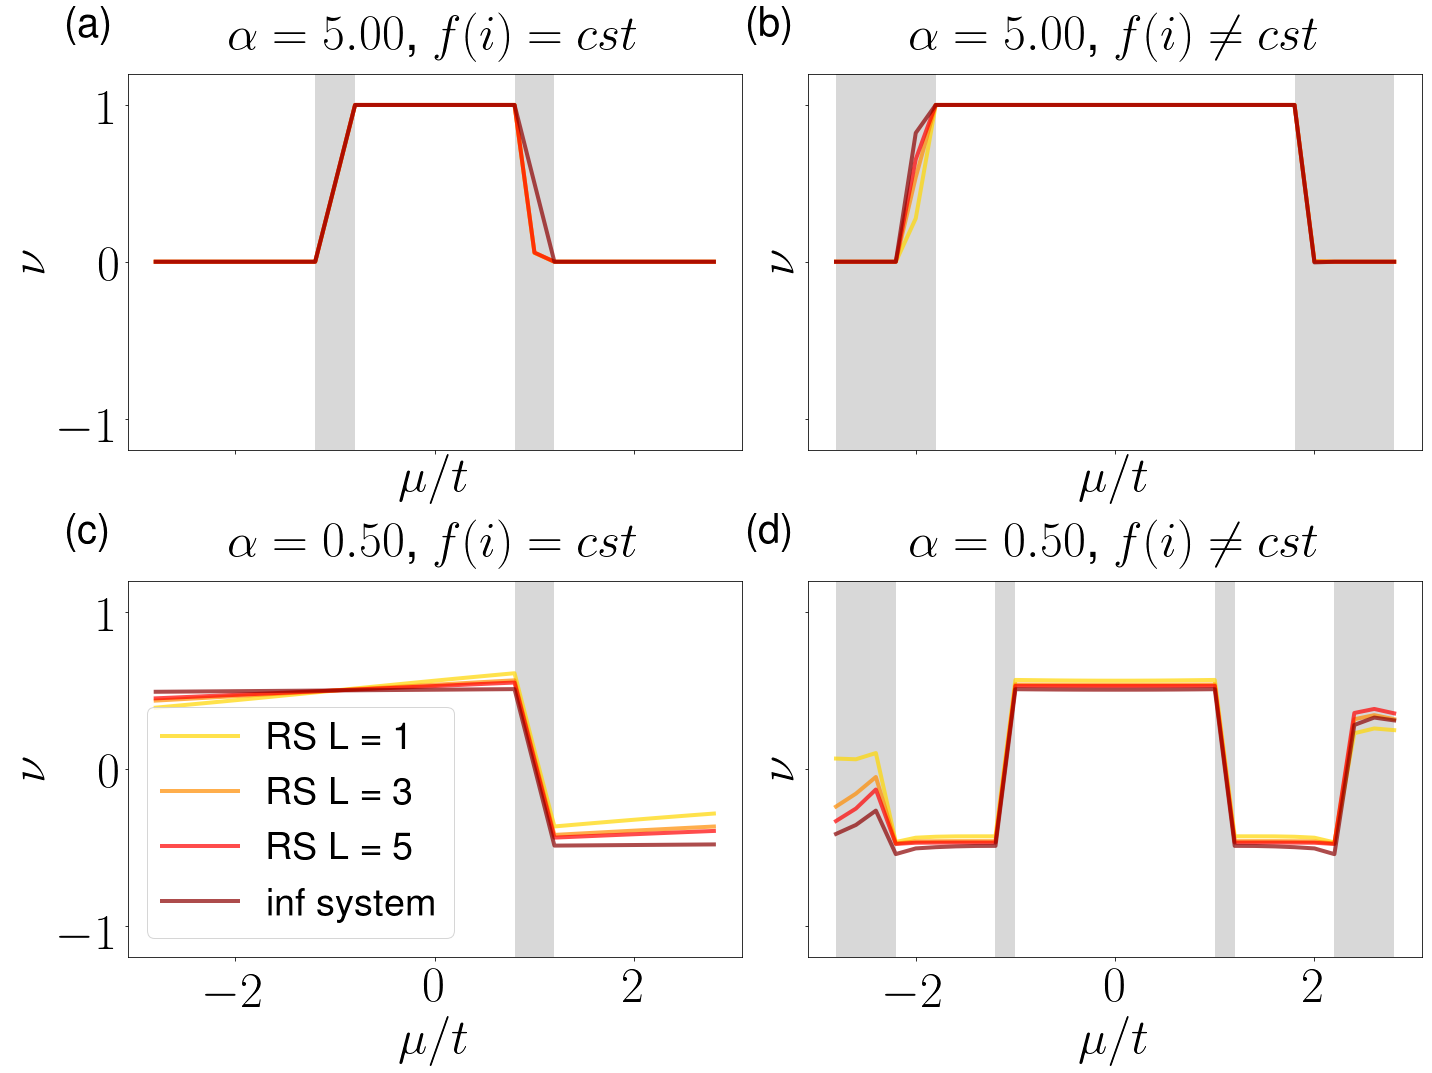

In [6]:
it_r = 12
it_c = 12
L = 1

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20,15))
j = 0
i = 0
for alpha in [5, 0.5]:
    print('alpha: ', alpha)
    
    for constant in [True, False]:
        print('constant: ', constant)

        i+=1
        
        vec_mu_c= np.arange(-3,3,0.2)     
        vec_w_c = np.load(path_data + 'C_winding_num_alpha_%.2f_constant_%s_it_%.0f.npy' %(alpha, str(constant), it_c))

        if (constant == True):
            vec_w_c = vec_w_c[abs(vec_mu_c-1)>0.01]
            vec_mu_c = vec_mu_c[abs(vec_mu_c-1)>0.01]
            
        ax = axes.flat[j]
        j += 1
        ax.set_ylabel(r'$\nu$', fontsize=fs)
        ax.set_xlabel(r'$\mu/t$', fontsize=fs)
        plt.grid(axis='both')
        if constant == True:
            ax.set_title(r'$\alpha = %.2f$, $f(i) = cst$' %(alpha), fontsize = fs, y = 1.05)
        else:
            ax.set_title(r'$\alpha = %.2f$, $f(i) \neq cst$' %(alpha), fontsize = fs, y = 1.05)  
            
        for L,color in zip([1,3,5], ['gold', 'darkorange', 'red']):

            vec_mu_r= np.arange(-3,3,0.2)     
            vec_w_r = np.load(path_data + 'RS_winding_num_alpha_%.2f_L_%.0f_constant_%s_it_%.0f.npy' %(alpha, L, str(constant), it_r))
            ax.plot(vec_mu_r[1:],vec_w_r[1:], color=color, linewidth = 4, linestyle='-', alpha = 0.7, label = r'RS L = %.0f'%L)
            
        ax.plot(vec_mu_c[1:],vec_w_c[1:], color='darkred', linewidth = 4, linestyle='-', alpha = 0.7, label = r'inf system')
        ax.set_ylim(-1.2,1.2)
        

        if i == 1:
            ax.axvspan(-0.8, -1.2, color='grey', alpha=0.3, lw=0)
            ax.axvspan(0.8, 1.2, color='grey', alpha=0.3, lw=0)            
        if i == 2:
            ax.axvspan(-2.8, -1.8, color='grey', alpha=0.3, lw=0)
            ax.axvspan(1.8, 2.8, color='grey', alpha=0.3, lw=0)
        if i == 3:
            ax.axvspan(0.8, 1.2, color='grey', alpha=0.3, lw=0)          
        if i == 4:
            ax.axvspan(-2.8, -2.2, color='grey', alpha=0.3, lw=0)
            ax.axvspan(2.2, 2.8, color='grey', alpha=0.3, lw=0)
            ax.axvspan(-1, -1.2, color='grey', alpha=0.3, lw=0)
            ax.axvspan(1, 1.2, color='grey', alpha=0.3, lw=0)    
        
for ax,lab in zip(axes.flat, ['(a)', '(b)', '(c)', '(d)']):
    if lab == '(c)':
        ax.legend(fontsize=fs-12, loc='lower left')
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
    
plt.tight_layout()
plt.savefig(path_figures + 'winding_num.pdf')

# CRITICAL SUPERCONDUCTING PAIRING

Fn:  233


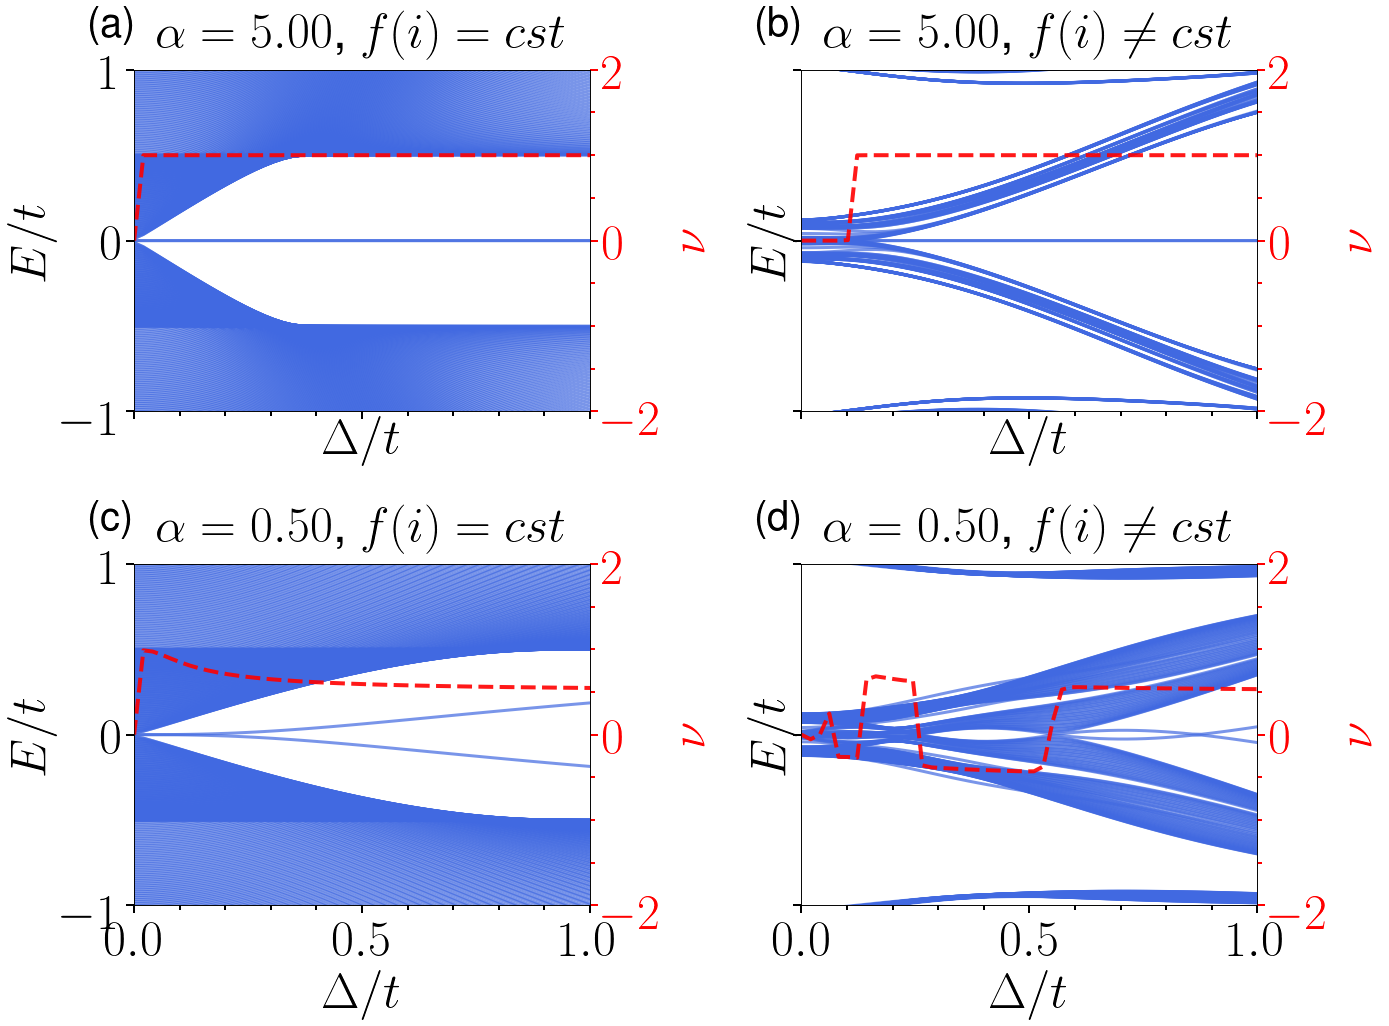

In [11]:
it = 12
length = 1
Fn1, Fn = Fibonacci(it)
print('Fn: ', Fn)

phase = 0
mu_list = np.arange(0.5,2.1,0.1)
t = -1 
j = 0
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20,15))

for alpha in [5, 0.5]:
    
    for constant,mu in zip([True, False],[0.5,1.2]):

        index = np.arange(len(mu_list))[abs(mu_list-mu)<0.001][0]

        ax1 = axes.flat[j]
        j += 1
        if constant == True:
            ax1.set_title(r'$\alpha = %.2f$, $f(i) = cst$' %(alpha), fontsize = fs, y=1.05)
        else:
            ax1.set_title(r'$\alpha = %.2f$, $f(i) \neq cst$' %(alpha), fontsize = fs, y = 1.05)
            
        ax1.set_ylabel(r'$E/t$', fontsize=fs)
        ax1.set_xlabel(r'$\Delta/t$', fontsize=fs)
        ax1.xaxis.set_minor_locator(AutoMinorLocator())
        ax1.tick_params(which='both', width=2)
        ax1.tick_params(which='major', length=8)
        ax1.tick_params(which='minor', length=5)
        
        energies_array = np.load(path_data + 'critical_delta/energies_array_mu_critical_delta_alpha_%.2f_constant_%s_it_%.0f.npy' %(alpha, constant, it))
        energies_r = energies_array[index]
        mu = mu_list[index]
            
        wn_array = np.load(path_data + 'critical_delta/wn_array_mu_critical_delta_alpha_%.2f_constant_%s_it_%.0f.npy' %(alpha, constant, it))
        vec_w = wn_array[index]
        mu = mu_list[index]

        delta_list = np.linspace(0,1,50)
        
        for i in range(len(energies_r)):
            energy = energies_r[i]
            ax1.plot(delta_list, energy, color='royalblue', linestyle='-', linewidth=3, alpha=0.7)
        ax1.set_ylim(-1,1)
            
        ax2 = ax1.twinx() 
        ax2.set_ylabel(r'$\nu$', fontsize=fs, color='red') 
        ax2.plot(delta_list, vec_w, color='red', linewidth = 4, linestyle='--', alpha = 0.9)
        ax2.set_ylim(-2,2)
        ax2.set_xlim(0,1)
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.tick_params(which='both', width=2)
        ax2.tick_params(which='major', length=8, color='r')
        ax2.tick_params(which='minor', length=5, color='r')
        ax2.tick_params(axis='y', labelcolor='red',grid_color='r', grid_alpha=0.5)

for ax,lab in zip(axes.flat, ['(a)', '(b)', '(c)', '(d)']):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
    
plt.tight_layout()
plt.savefig(path_figures + 'critical_delta.pdf')

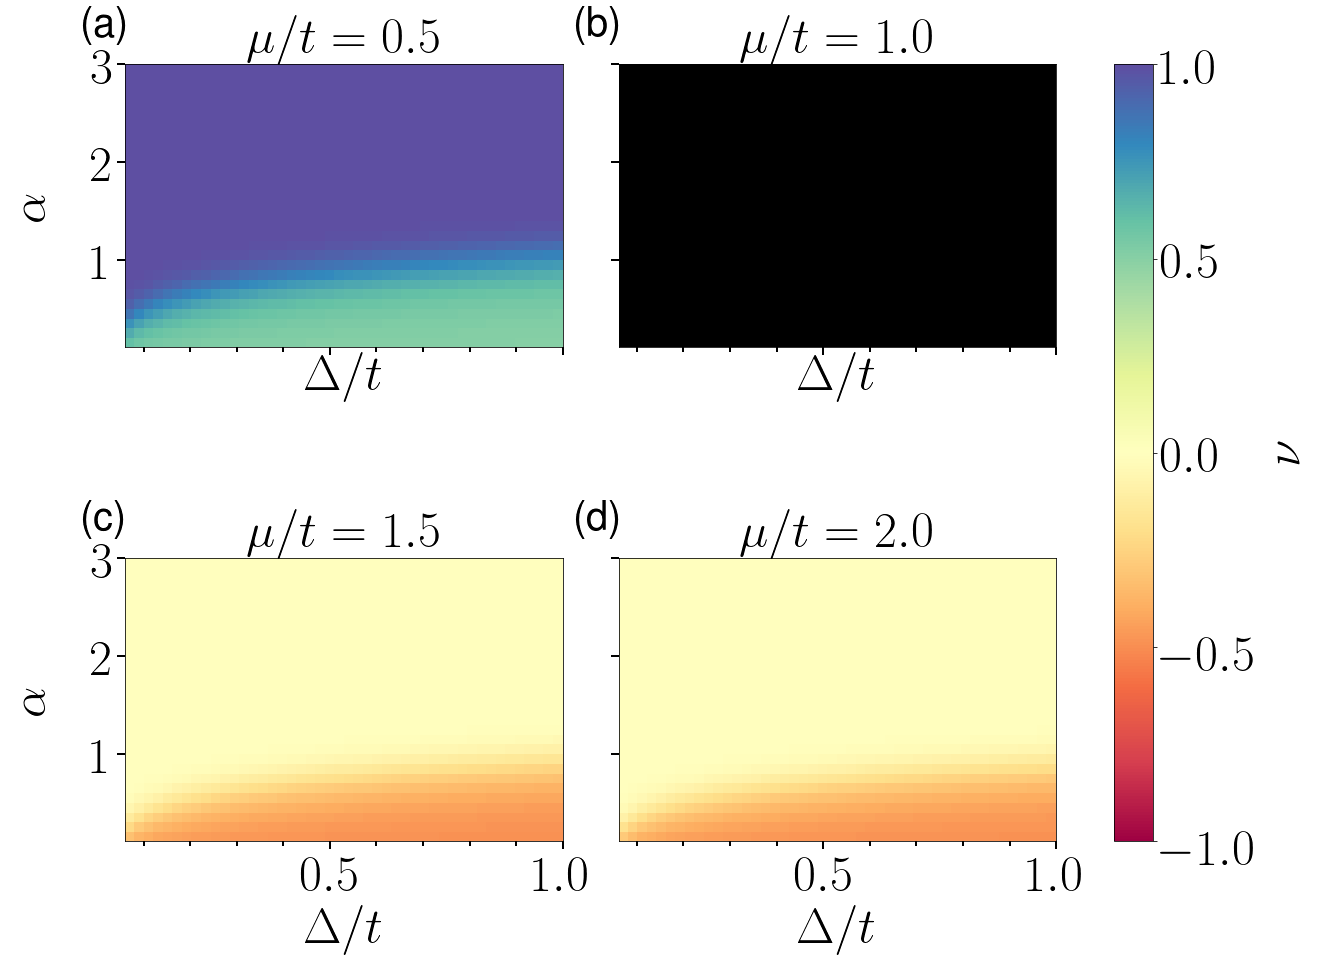

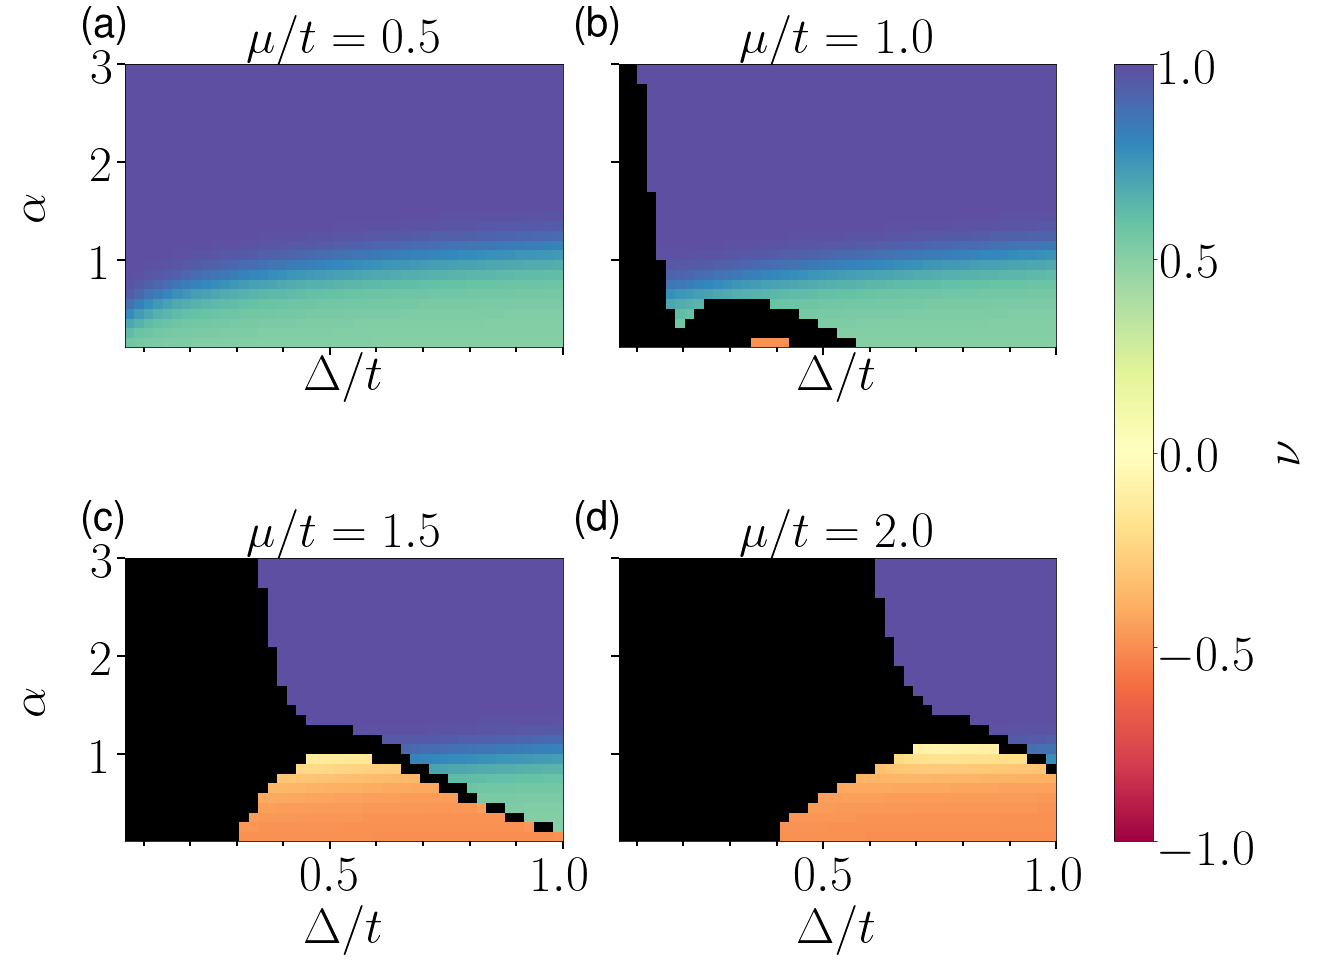

In [12]:
it = 12
length = 1
Fn1, Fn = Fibonacci(it)

mu_list = [0.5,1,1.5,2]
alpha_list = np.arange(0.1,3.1,0.1)
delta_list = np.linspace(0,1,50)

cmap = plt.get_cmap('Spectral')
cmap.set_under('k')

for constant,gap_th in zip([True, False], [0.035,0.025]):

    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20,15))
    i = 0

    for mu,ax in zip(mu_list,axes.flat):
        
        wn_array = np.load(path_data + 'critical_delta/wn_array_critical_delta_mu_%.2f_constant_%s_it_%.0f.npy' %(mu, constant, it))
        energies_array = np.load(path_data + 'critical_delta/energies_array_critical_delta_mu_%.2f_constant_%s_it_%.0f.npy' %(mu, constant, it))
        
        gap_array = []
        for energies in energies_array:
            energies = energies.T
            gap_list = []
            for energy_delta in energies:
                energies_sorted = np.sort(abs(energy_delta))
                gap_list = np.append(gap_list, energies_sorted[2])
            if len(gap_array) == 0:
                gap_array = gap_list
            else:
                gap_array = np.vstack((gap_array, gap_list))
        
        for k,alpha in enumerate(alpha_list):
            for l,delta in enumerate(delta_list[1:]):
                if gap_array[k][l] < gap_th:
                    wn_array[k][l] = -2
                    #ax.scatter(delta, alpha, marker = 'o', color = 'k', s=70)
                    
        ax.set_title(r'$\mu/t = %.1f$' %mu, fontsize=fs, y=1.02)
        ax.set_xlabel(r'$\Delta/t$', fontsize=fs)
        im = ax.pcolormesh(delta_list[3:], alpha_list, wn_array[:,3:], vmin=-1, vmax=1, cmap=cmap, rasterized = True)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(which='both', width=2)
        ax.tick_params(which='major', length=8)
        ax.tick_params(which='minor', length=5)
        plt.xlim(delta_list[3],delta_list[-1])
        plt.ylim(alpha_list[0], alpha_list[-1])
                     
    fig.add_subplot(211, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.ylabel(r'$\alpha$', fontsize=fs)
    fig.add_subplot(212, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.ylabel(r'$\alpha$', fontsize=fs)
    plt.tight_layout()
    
    cbar = plt.colorbar(im, ax=axes.ravel().tolist())
    cbar.ax.set_ylabel(r'$\nu$', fontsize=fs)
    
    for ax,lab in zip(axes.flat, ['(a)', '(b)', '(c)', '(d)']):
        ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
    
    fig.savefig(path_figures + 'critical_delta_colormap_constant_%s.pdf' %constant)     

# CROSSINGS AT ZERO ENERGY

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


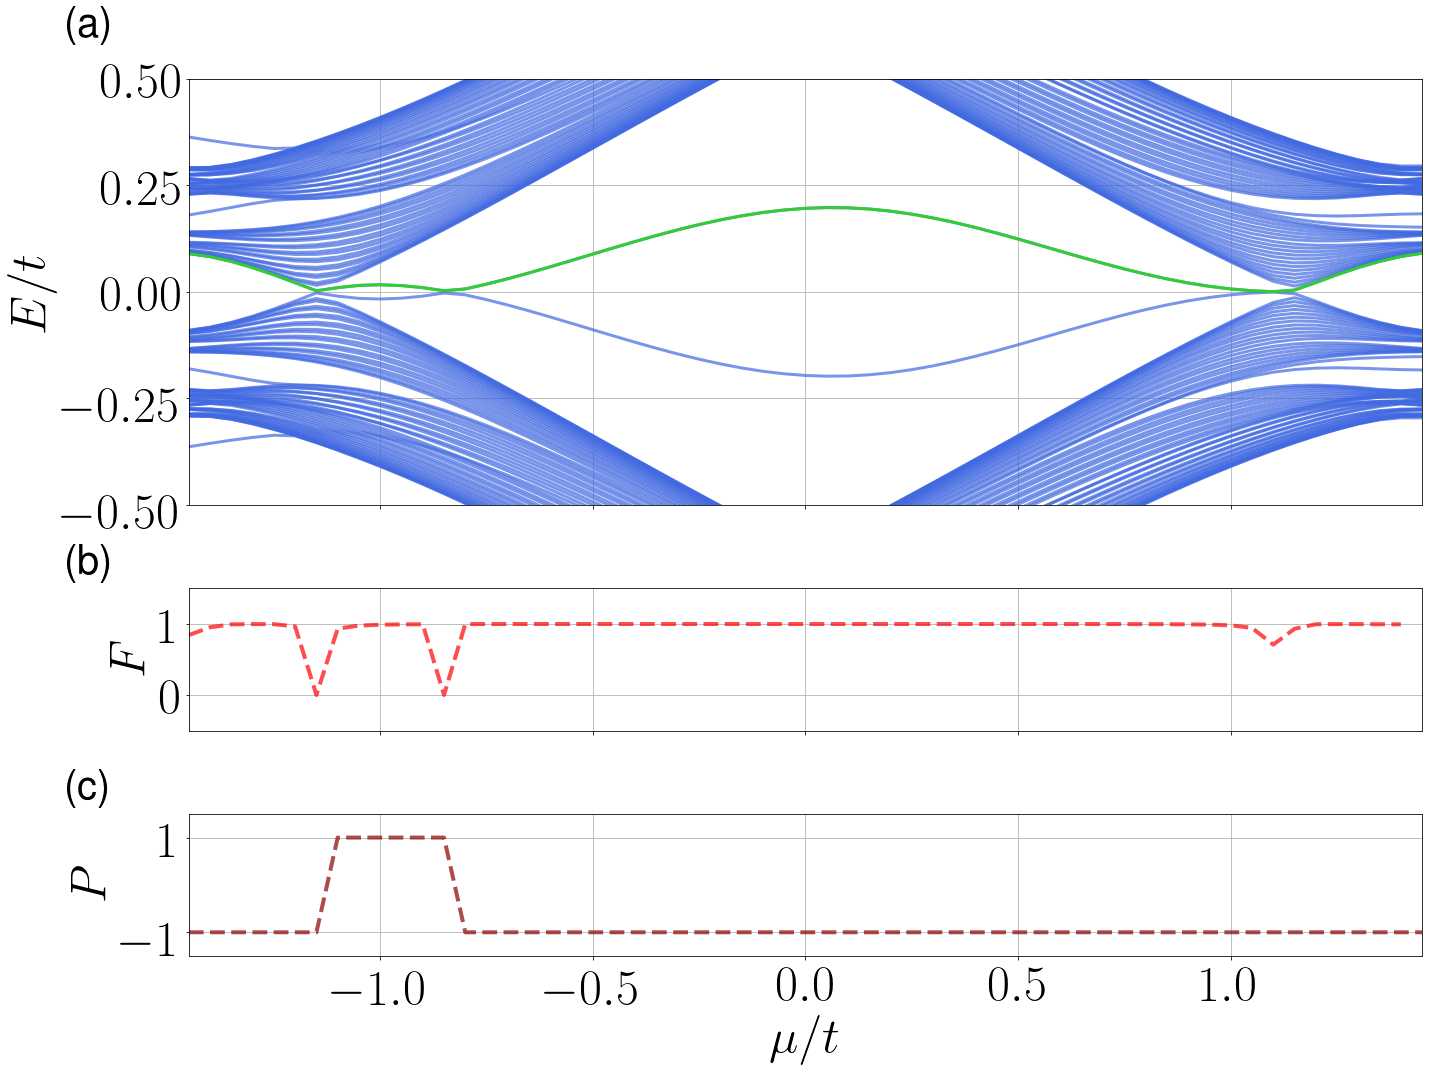

In [3]:
it= 12
Fn1, Fn = Fibonacci(it)
length = 1

mu_list = np.arange(-1.5,1.5,0.05)[1:]
phase_list = [np.pi]

fig = plt.figure(figsize=(20,15)) 
gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
i = 0
    
for phase in phase_list:
    
    energies_r = np.load(path_data + 'crossings/crossing_bands_phase_%.2f_it_%.0f.npy' %(phase,it))
    overlap1 = np.load(path_data + 'crossings/crossing_quantum_fidelity_1_phase_%.2f_it_%.0f.npy' %(phase,it))[1:]
    overlap2 = np.load(path_data + 'crossings/crossing_quantum_fidelity_2_phase_%.2f_it_%.0f.npy' %(phase,it))[1:]
    parity = np.load(path_data + 'crossings/parity.npy')
    
    ax0.set_ylabel(r'$E/t$', fontsize = fs)  
    for i in range(len(energies_r)):
        energy = energies_r[i]
        ax0.plot(mu_list, energy[1:], color='royalblue', linestyle='-', linewidth=3, alpha=0.7)
    ax0.set_ylim(-0.5,0.5)
    evals_min = []
    for energy in energies_r.T:
        evals_min = np.append(evals_min, np.min(abs(energy)))
    ax0.plot(mu_list, evals_min[1:], color='limegreen', linestyle='-', linewidth=3)
    ax0.tick_params(labelbottom=False) 
    ax0.grid()
    ax1.plot(mu_list[:-1], overlap1, 'r--', linewidth = 4, alpha = 0.7)
    ax1.set_ylabel(r'$F$', fontsize=fs)
    ax1.set_ylim(-0.5,1.5)
    ax1.set_yticks(ticks=[0,1])
    ax1.tick_params(labelbottom=False) 
    ax1.grid()
    
    ax2.plot(mu_list, parity, linestyle= '--', color= 'darkred', linewidth = 4, alpha = 0.7)
    ax2.set_ylabel(r'$P$', fontsize=fs)
    ax2.set_xlabel(r'$\mu/t$', fontsize = fs)
    ax2.set_ylim(-1.5,1.5)
    ax2.set_yticks(ticks=[-1,1])
    ax2.grid()
    
    ax0.set_xlim(-1.45,1.45)
    ax1.set_xlim(-1.45,1.45)
    ax2.set_xlim(-1.45,1.45)
    
    for ax,lab in zip([ax0,ax1,ax2], ['(a)', '(b)', '(c)']):
        ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
    plt.tight_layout()
    plt.savefig(path_figures + 'quantum_fidelity_crossing.pdf')

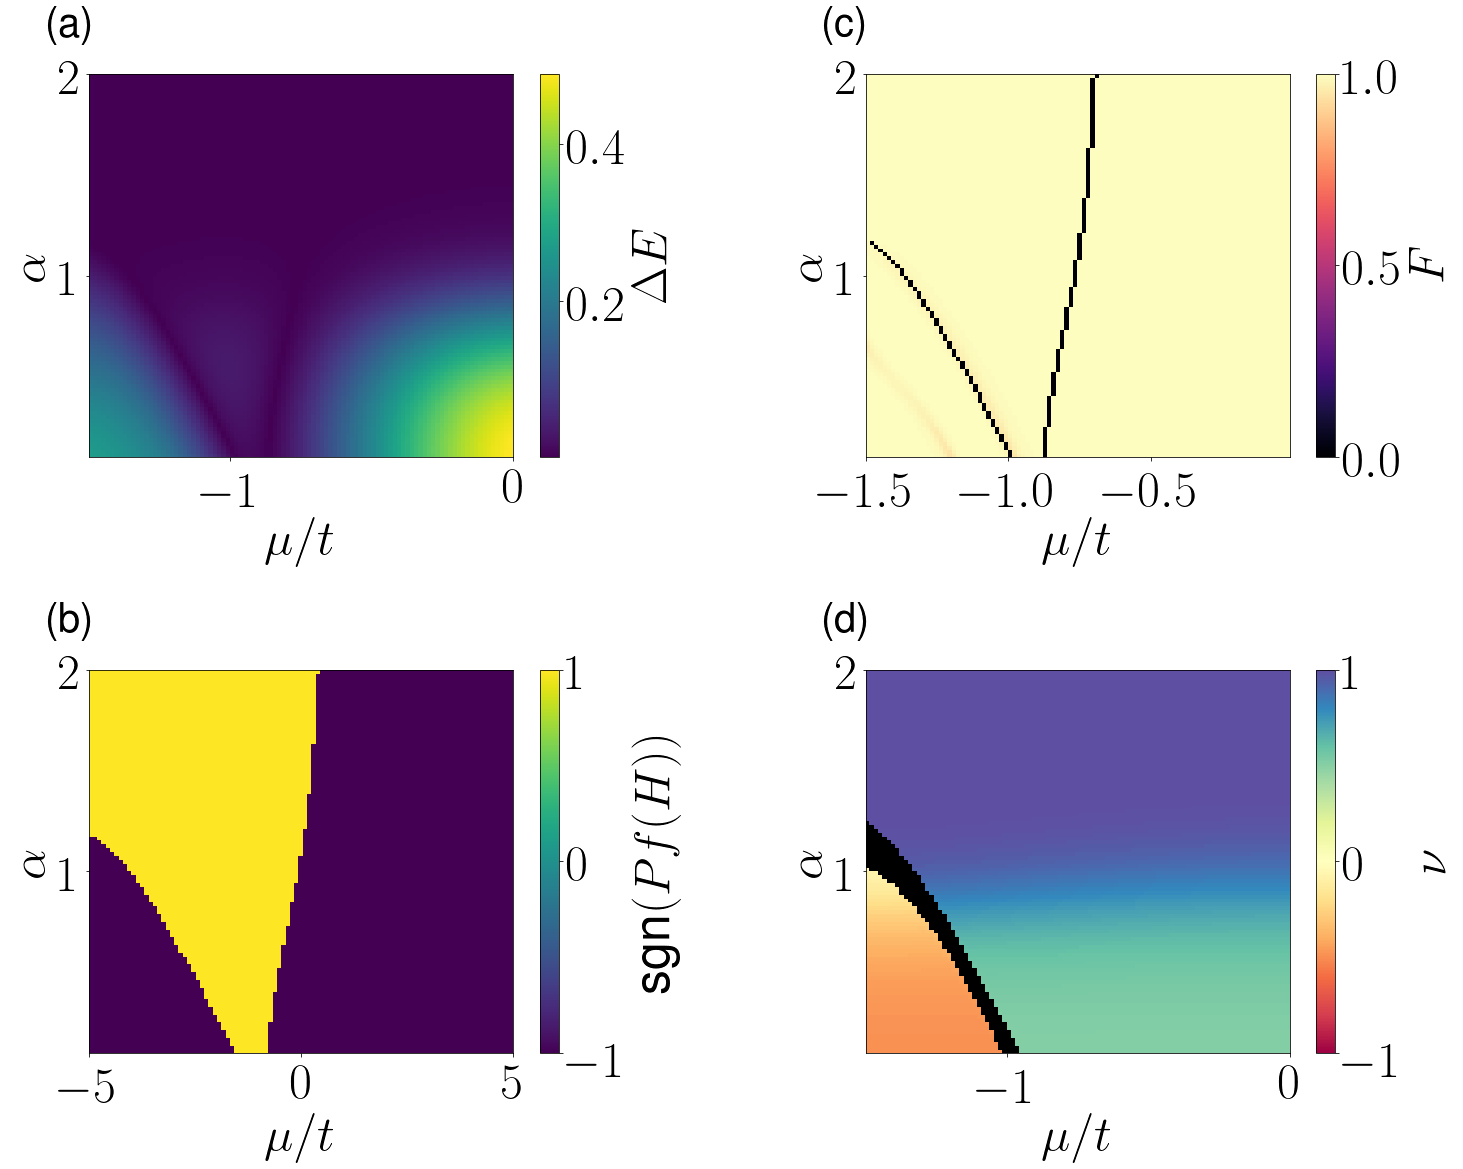

In [7]:
it= 12
Fn1, Fn = Fibonacci(it)
length = 1
gap_th = 0.02
c_th = 0.005

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(22,17))

alpha_list = np.linspace(0.1,2,100)
mu_list = np.linspace(-1.5,0,100)

crossings_alpha_mu = np.load(path_data + 'crossings/crossings_mu_alpha.npy')
overlap_alpha_mu = np.load(path_data + 'crossings/overlap1_mu_alpha.npy')
wn_alpha_mu = np.load(path_data + 'crossings/wn_mu_alpha.npy')

ax1 = axes.flat[0]
ax1.set_xlabel(r'$\mu/t$', fontsize=fs)
ax1.set_ylabel(r'$\alpha$', fontsize=fs)
im = ax1.pcolormesh(mu_list, alpha_list, crossings_alpha_mu, cmap='viridis', rasterized = True)
cbar = plt.colorbar(im, ax=ax1)
cbar.ax.set_ylabel(r'$\Delta E$', fontsize=fs)
         
ax2 = axes.flat[1]
ax2.set_xlabel(r'$\mu/t$', fontsize=fs)
ax2.set_ylabel(r'$\alpha$', fontsize=fs)
im = ax2.pcolormesh(mu_list[:-1], alpha_list, overlap_alpha_mu, vmin=0, vmax=1, cmap='magma', rasterized = True)
cbar = plt.colorbar(im, ax=ax2)
cbar.ax.set_ylabel(r'$F$', fontsize=fs)

cmap = plt.get_cmap('Spectral')
cmap.set_under('k')
gap_array = np.load(path_data + 'crossings/gaps_mu_alpha.npy')
for k,mu in enumerate(mu_list):
    for l,alpha in enumerate(alpha_list):
        if gap_array[k][l] < gap_th:
            wn_alpha_mu[k][l] = -2

ax3 = axes.flat[3]
ax3.set_xlabel(r'$\mu/t$', fontsize=fs)
ax3.set_ylabel(r'$\alpha$', fontsize=fs)
im = ax3.pcolormesh(mu_list, alpha_list, wn_alpha_mu, cmap=cmap, vmin=-1, vmax=1, rasterized = True)
cbar = plt.colorbar(im, ax=ax3)
cbar.ax.set_ylabel(r'$\nu$', fontsize=fs)

mu_list2 = np.linspace(-5,5,100)
crossings_mu_alpha = np.load(path_data + 'crossings/parity_mu_alpha.npy')
ax4 = axes.flat[2]
ax4.set_xlabel(r'$\mu/t$', fontsize=fs)
ax4.set_ylabel(r'$\alpha$', fontsize=fs)
im = ax4.pcolormesh(mu_list2, alpha_list, np.real(crossings_mu_alpha), cmap='viridis', rasterized = True)
cbar = plt.colorbar(im, ax=ax4)
cbar.ax.set_ylabel(r'sgn$(Pf(H))$', fontsize=fs)
 

for ax,lab in zip(axes.T.flat, ['(a)', '(b)', '(c)','(d)', '(e)', '(f)']):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
    
plt.tight_layout()
fig.savefig(path_figures + 'crossings_mu.pdf')  

# SCALING AT ALPHA ~ 1

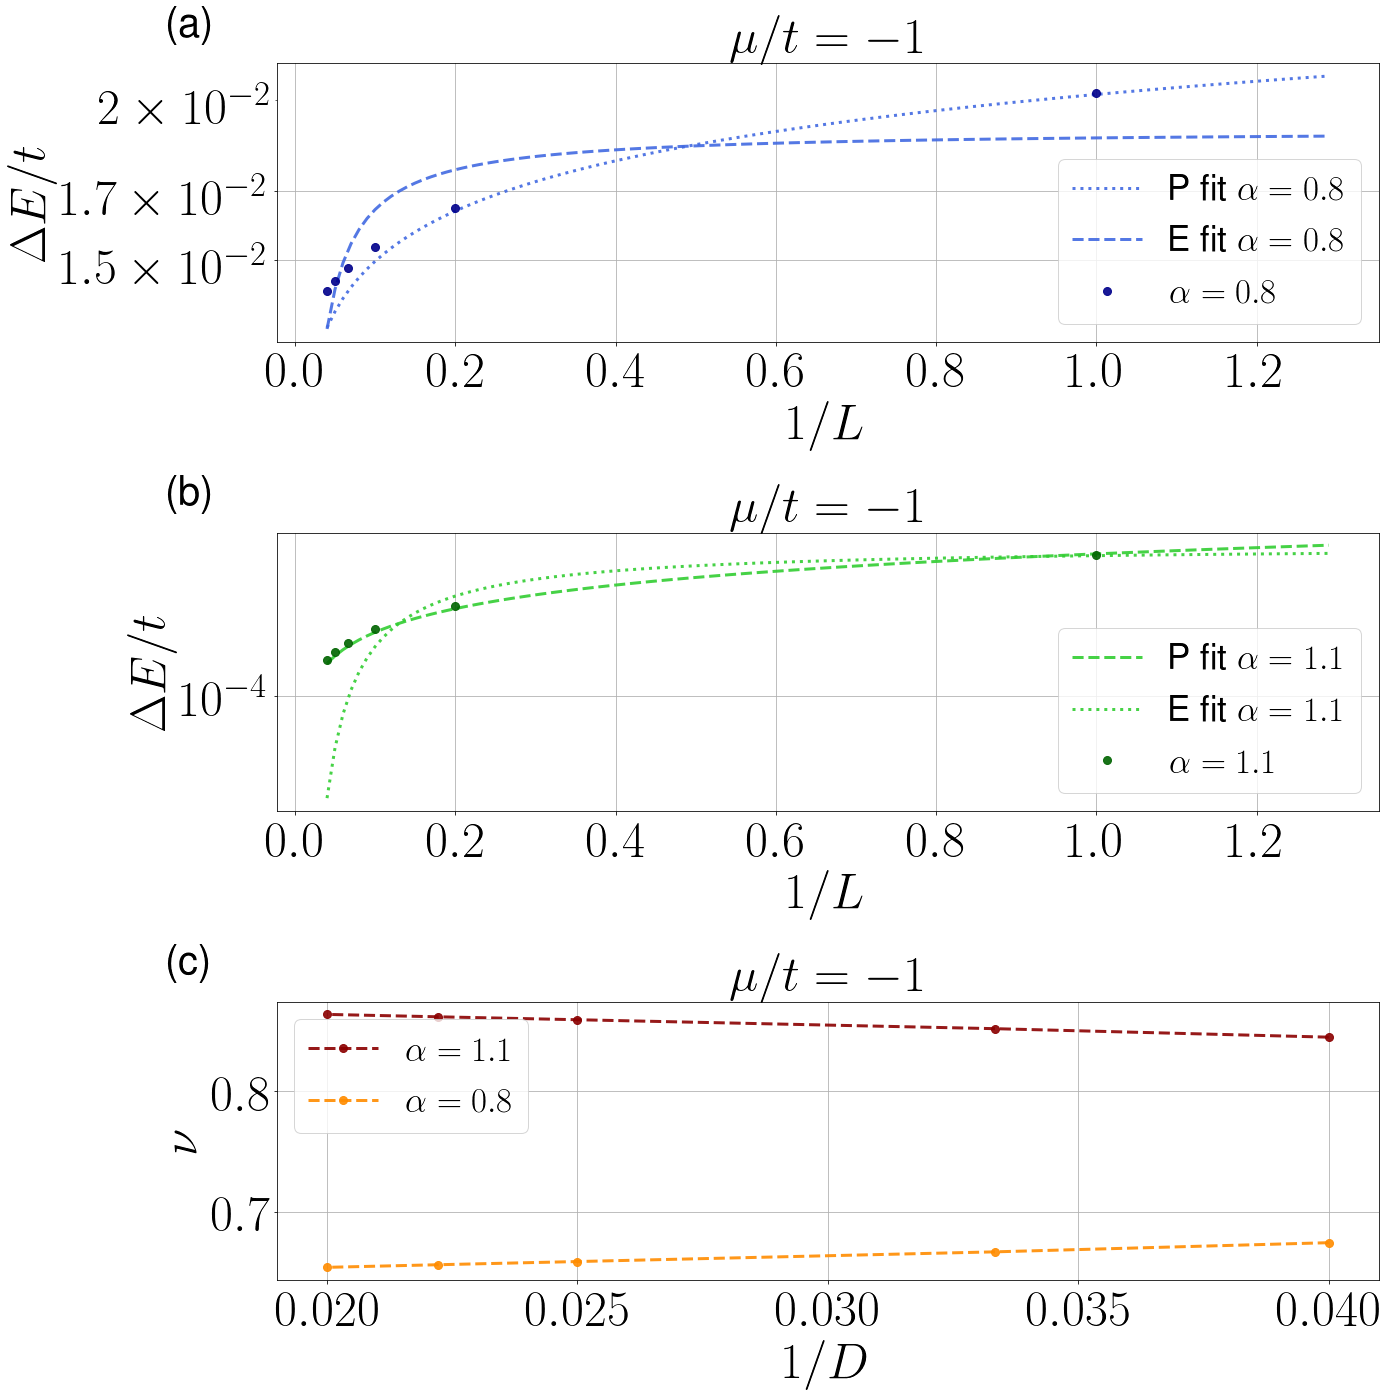

In [12]:
it = 12
length = 1
Fn1, Fn = Fibonacci(it)

length_list = np.array([1,5,10,15,20,25])
D_list = np.array([25,30,35,40,45,50])
alpha_list = [0.9,1.1]

x = np.arange(0.04,1.3,0.01)
xp = np.load(path_data + 'crossings/polyfit.npy')
xe = np.load(path_data + 'crossings/exfit.npy')

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(20,20))

mu = -1
    
wn_inf_array = np.load(path_data + 'crossings/scaling_wn_c_mu_%.2f.npy' %(mu))
wn_inf_array_0 = wn_inf_array[0][abs(wn_inf_array[0])<1]
wn_inf_array_1 = wn_inf_array[1][abs(wn_inf_array[1])<1]
D_list_0 = D_list[abs(wn_inf_array[0])<1]
D_list_1 = D_list[abs(wn_inf_array[1])<1]

gaps_array_0 = np.load(path_data + 'crossings/scaling_gaps_mu_%.2f.npy' %(mu))[0]
gaps_array_1 = np.load(path_data + 'crossings/scaling_gaps_mu_%.2f.npy' %(mu))[3]    

ax1 = axes[0]
ax2 = axes[1]

ax1.set_title(r'$\mu/t= %.0f$' %mu, fontsize=fs, y = 1.02)
ax1.set_xlabel(r'$1/L$', fontsize=fs)
ax1.set_ylabel(r'$\Delta E/t$', fontsize=fs)
ax2.set_title(r'$\mu/t= %.0f$' %mu, fontsize=fs, y = 1.02)
ax2.set_xlabel(r'$1/L$', fontsize=fs)
ax2.set_ylabel(r'$\Delta E/t$', fontsize=fs)

ax1.semilogy(x, 0.0202*np.power(x,0.13), color='royalblue', linestyle='dotted',linewidth = 3, alpha=0.9, label=r'P fit $\alpha = 0.8$')  
ax1.semilogy(x, 0.0189534*np.exp(-0.0142818/x), color='royalblue', linestyle='--',linewidth = 3, alpha=0.9, label=r'E fit $\alpha = 0.8$')
ax1.semilogy(1/length_list, gaps_array_0, 'o', markersize=8, color='darkblue', alpha=0.9, label=r'$\alpha = 0.8$')
yticks = [0.017, 0.015]
ax1.set_yticks(yticks)
ax1.legend(fontsize = fs - 15)
ax1.grid()

ax2.semilogy(x, 0.0035*np.power(x,0.85) , color='limegreen', linestyle='--',linewidth = 3, alpha=0.9, label=r'P fit $\alpha = 1.1$') 
ax2.semilogy(x, 0.00430747*np.exp(-0.252242/x), color='limegreen', linestyle='dotted',linewidth = 3, alpha=0.9, label=r'E fit $\alpha = 1.1$')  
ax2.semilogy(1/length_list, gaps_array_1, 'o', markersize=8, color='darkgreen', alpha=0.9, label=r'$\alpha = 1.1$')   
ax2.legend(fontsize = fs - 15)
ax2.grid()

ax = axes[2]
ax.set_title(r'$\mu/t= %.0f$' %mu, fontsize=fs, y = 1.02)
ax.set_xlabel(r'$1/D$', fontsize=fs)
ax.set_ylabel(r'$\nu$', fontsize=fs)
ax.plot(1/D_list_1, wn_inf_array_1, 'o--', color='darkred', markersize = 8, linewidth = 3, alpha=0.9, label=r'$\alpha = 1.1$')  
ax.plot(1/D_list_0, wn_inf_array_0, 'o--', color='darkorange', markersize=8,  linewidth = 3, alpha=0.9, label=r'$\alpha = 0.8$')
ax.legend(fontsize = fs - 15)     
ax.grid()

plt.tight_layout()
for ax,lab in zip(axes.flat, ['(a)', '(b)', '(c)','(d)', '(e)']):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')

plt.savefig(path_figures + 'scaling_alpha.pdf')

# AAH EDGE STATES

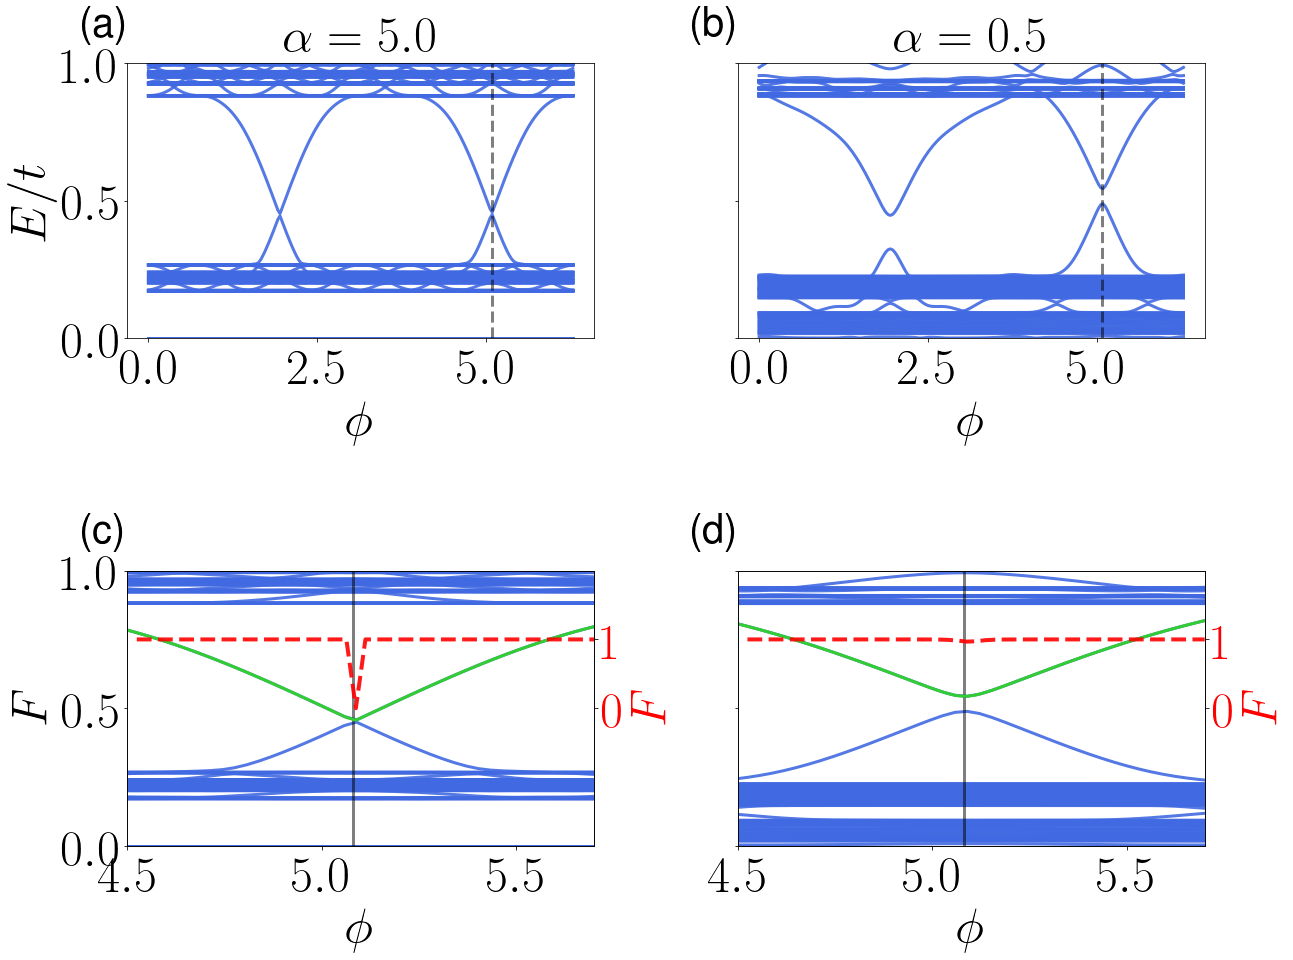

In [13]:
it = 12
length = 1
Fn1, Fn = Fibonacci(it)

mu = 1

phase_list = np.linspace(0, 2*np.pi, 201)
phase_list_qf = np.linspace(4.5, 5.7, 50)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=True, figsize=(20,15))
j = 0

for delta in [0.3]:
    
    if delta == 0.3:
        alpha_list = [5,0.5]
    else:
        alpha_list = [0]
        
    for alpha in  alpha_list:
        
        energies_r = np.load(path_data + 'AA_states/crossings_phase_delta_%.2f_alpha_%.2f_mu_%.2f.npy' %(delta,alpha,mu))
        ax = axes[0][j]
        if delta == 0:
            ax.set_title(r'$\Delta = %.0f$' %delta, fontsize=fs, y = 1.02)
        else:
            ax.set_title(r'$\alpha = %.1f$' %alpha, fontsize=fs, y= 1.02)
        ax.set_xlabel(r'$\phi$', fontsize=fs)
        for i in range(len(energies_r)):
            energy = energies_r[i]
            ax.plot(phase_list, energy, color='royalblue', linestyle='-',linewidth = 3, alpha=0.9)
        ax.axvline(5.08, color='k', linestyle='--', linewidth='3', alpha=0.5)
        ax.set_ylim(0,1.5)  
        
        ax1 = axes[1][j]
        ax1.set_xlabel(r'$\phi$', fontsize=fs)
        for i in range(len(energies_r)):
            energy = energies_r[i]
            ax1.plot(phase_list, energy, color='royalblue', linestyle='-',linewidth = 3, alpha=0.9)
        ax1.axvline(5.08, color='k', linestyle='-', linewidth='3', alpha=0.5)
        ax1.set_ylim(0,1) 
        ax1.set_xlim(4.5,5.7)
        evals = np.load(path_data + 'AA_states/crossing_bands_alpha_%.2f_delta_%.2f_mu_%.2f.npy' %(alpha,delta,mu))
        ax1.plot(phase_list_qf, evals[0], color='limegreen', linestyle='-', linewidth='3')
        qf = np.load(path_data + 'AA_states/quantum_fidelity_alpha_%.2f_delta_%.2f_mu_%.2f.npy' %(alpha,delta,mu))
        ax2 = ax1.twinx() 
        ax2.set_ylim(-2,2)
        ax2.set_ylabel(r'$F$', fontsize=fs, color='red') 
        ax2.plot(phase_list_qf[1:], qf[0], 'r--', linewidth = 4, alpha = 0.9)
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.set_yticks(ticks=[0,1])
        j +=1
        

fig.add_subplot(211, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'$E/t$', fontsize=fs)
fig.add_subplot(212, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'$F$', fontsize=fs)

plt.tight_layout()
for ax,lab in zip(axes.flat, ['(a)', '(b)', '(c)','(d)', '(e)']):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')

plt.savefig(path_figures + 'AA_quantum_fidelity_crossings.pdf')

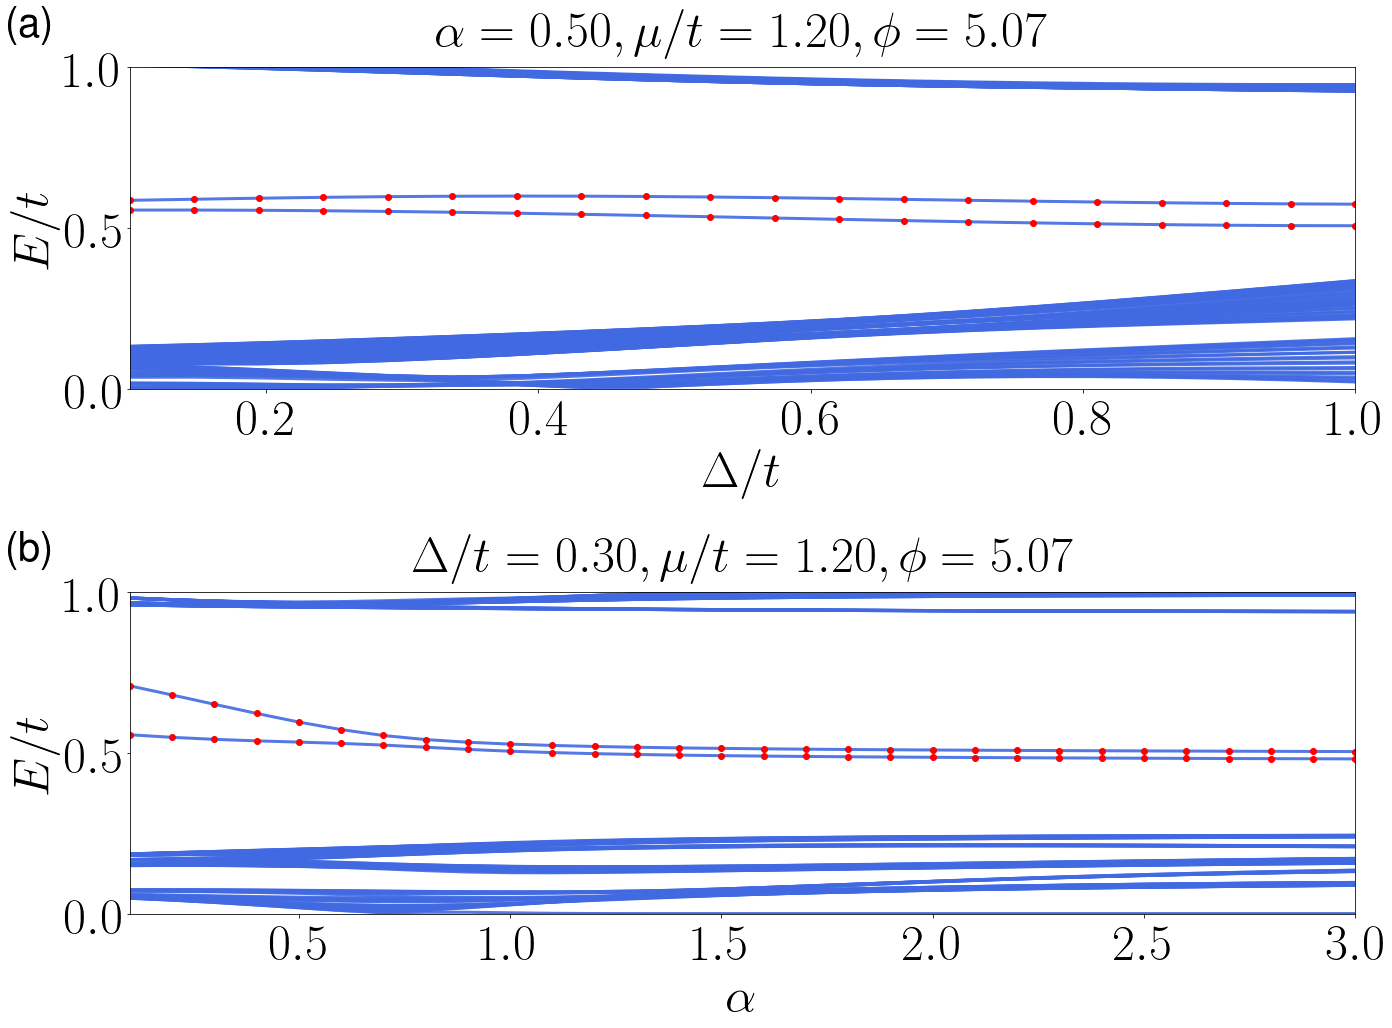

In [14]:
it = 12
length = 1
Fn1, Fn = Fibonacci(it)

mu = 1.2
phase = 5.07
alpha = 0.5
delta = 0.3

delta_list = np.linspace(0.1,1,20)
alpha_list = np.linspace(0.1,3,30)

denergies_r = np.load(path_data + 'AA_states/cdelta_bands_mu_%.2f_phase_%.2f_it_%.0f.npy' %(mu, phase,it))
devals1 = np.load(path_data + 'AA_states/cdelta_evals1_bands_mu_%.2f_phase_%.2f_it_%.0f.npy' %(mu, phase,it))
devals2 = np.load(path_data + 'AA_states/cdelta_evals2_bands_mu_%.2f_phase_%.2f_it_%.0f.npy' %(mu, phase,it))

aenergies_r = np.load(path_data + 'AA_states/alpha_bands_mu_%.2f_phase_%.2f_it_%.0f.npy' %(mu, phase,it))
aevals1 = np.load(path_data + 'AA_states/alpha_evals1_bands_mu_%.2f_phase_%.2f_it_%.0f.npy' %(mu, phase,it))
aevals2 = np.load(path_data + 'AA_states/alpha_evals2_bands_mu_%.2f_phase_%.2f_it_%.0f.npy' %(mu, phase,it))

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(20,15))

ax = axes[0]
ax.set_title(r'$\alpha = %.2f, \mu/t = %.2f, \phi = %.2f$' %(alpha,mu,phase), fontsize=fs, y = 1.05)
ax.set_xlabel(r'$\Delta/t$', fontsize=fs)
ax.set_ylabel(r'$E/t$', fontsize=fs)

for i in range(len(denergies_r)):
    energy = denergies_r[i]
    ax.plot(delta_list, energy, color='royalblue', linestyle='-', linewidth=3, alpha=0.9,zorder=0)
ax.scatter(delta_list, devals1, color='red', marker='o', rasterized = True)
ax.scatter(delta_list, devals2, color='red', marker = 'o', rasterized = True)
ax.set_ylim(0,1)
ax.set_xlim(0.1,1)

ax = axes[1]
ax.set_title(r'$\Delta/t = %.2f, \mu/t = %.2f, \phi = %.2f$' %(delta,mu,phase), fontsize=fs, y=1.05)
ax.set_xlabel(r'$\alpha$', fontsize=fs)
ax.set_ylabel(r'$E/t$', fontsize=fs)

for i in range(len(aenergies_r)):
    energy = aenergies_r[i]
    ax.plot(alpha_list, energy, color='royalblue', linestyle='-', linewidth=3, alpha=0.9, zorder=0)
ax.scatter(alpha_list, aevals1, color='red', marker='o', rasterized = True)
ax.scatter(alpha_list, aevals2, color='red', marker = 'o', rasterized = True)
ax.set_ylim(0,1)
ax.set_xlim(0.1,3)

plt.tight_layout()

for ax,lab in zip(axes.flat, ['(a)', '(b)']):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
    
plt.savefig(path_figures + 'AA_edge_states_delta_alpha.pdf')

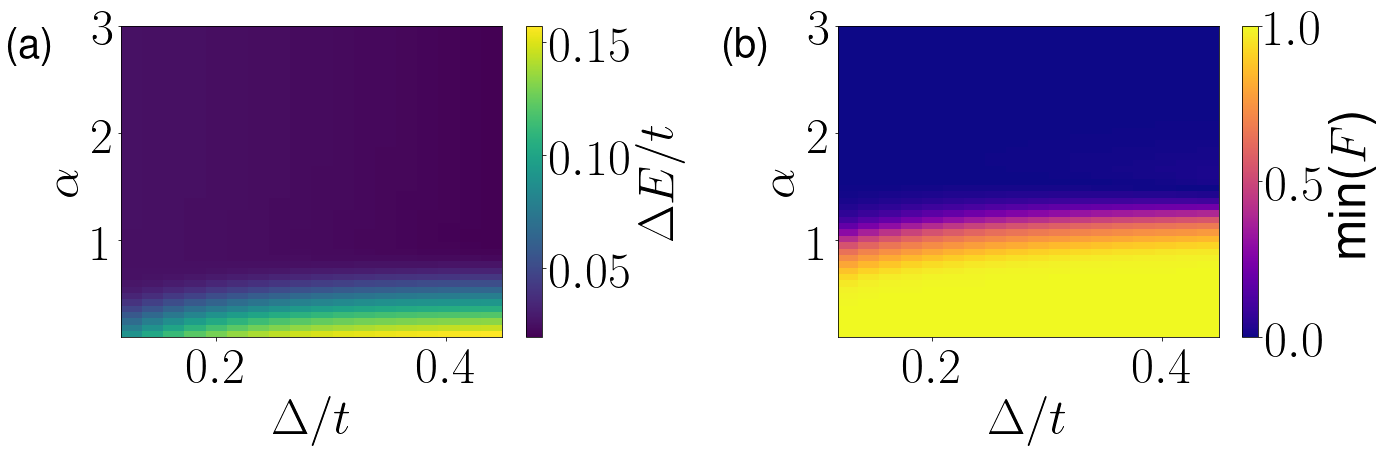

In [16]:
it = 12
length = 1
Fn1, Fn = Fibonacci(it)

mu = 1.2
delta_list = np.linspace(0.1,1,50)[:-30]
alpha_list = np.linspace(0.1,3,50)
delta_list_chern = np.linspace(0,0.5,25)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,7))
ax1 = axes[0]
ax2 = axes[1]

i = 0
            
gaps = np.load(path_data + 'AA_states/gaps_alpha_delta_mu_%.2f_it_%.0f.npy' %(mu,it))
overlap = np.load(path_data + 'AA_states/overlap_alpha_delta_mu_%.2f_it_%.0f.npy' %(mu,it))
#chern = np.load(path_data + 'AA_states/chern_array_critical_delta_mu_0.50_eg_0.73_it_6.npy')

ax1.set_xlabel(r'$\Delta/t$', fontsize=fs)
ax1.set_ylabel(r'$\alpha$', fontsize=fs)
im = ax1.pcolormesh(delta_list[1:], alpha_list, gaps,  cmap='viridis',rasterized = True)
cbar = plt.colorbar(im, ax=ax1)
cbar.ax.set_ylabel(r'$\Delta E/t$', fontsize=fs)

ax2.set_xlabel(r'$\Delta/t$', fontsize=fs)
ax2.set_ylabel(r'$\alpha$', fontsize=fs)
im = ax2.pcolormesh(delta_list[1:], alpha_list, overlap, vmin=0, vmax=1, cmap='plasma',rasterized = True)
cbar = plt.colorbar(im, ax=ax2)

cbar.ax.set_ylabel(r'min($F$)', fontsize=fs)

#ax3.set_xlabel(r'$\Delta/t$', fontsize=fs)
#ax3.set_ylabel(r'$\alpha$', fontsize=fs)

#im = ax3.pcolormesh(delta_list_chern, alpha_list[:len(chern)], chern, vmin=0, vmax=2, cmap='magma',rasterized = True)
#plt.xlim(delta_list[1],delta_list[-1])
#cbar = plt.colorbar(im, ax=ax3)
#cbar.ax.set_ylabel(r'$C$', fontsize=fs)

for ax,lab in zip([ax1,ax2], ['(a)', '(b)']):
    ax.text(-0.3, 0.9, lab, transform=ax.transAxes, size=40, weight='bold', family='STIXGeneral')
fig.tight_layout()

fig.savefig(path_figures + 'AA_colormap.pdf')

# APPENDIX: WEAK BULK-EDGE CORRESPONDENCE

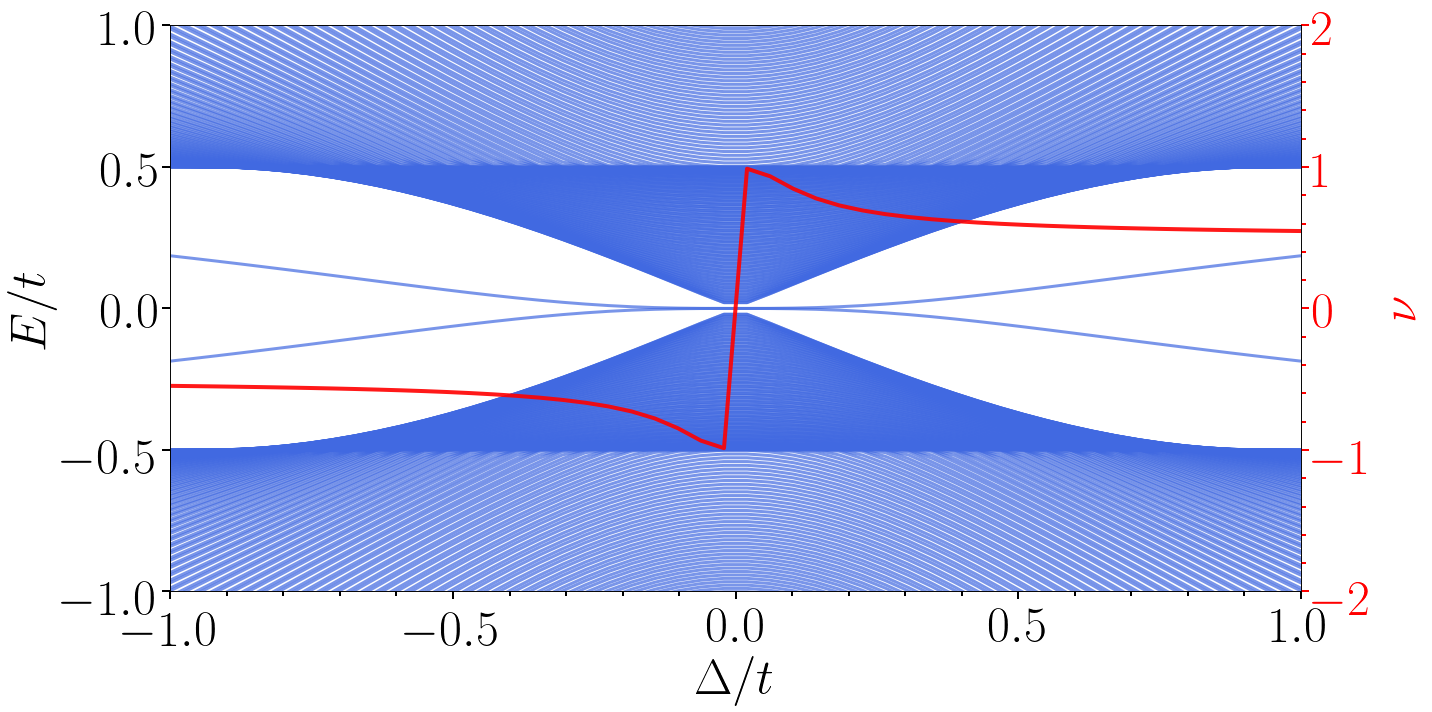

In [5]:
it= 12
Fn1, Fn = Fibonacci(it)
length = 1

delta_list = np.linspace(-1,1,50)
energies_r = vec_w = []
mu = 0.5

energies_r = np.load(path_data + 'weak_bec_delta_energies_it_%.0f_mu_%.2f.npy' %(it, mu))
vec_w = np.load(path_data + 'weak_bec_delta_wn_it_%.0f_mu_%.2f.npy' %(it, mu))

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)

ax1.set_title(r'', fontsize = fs, y = 1.05)    
ax1.set_ylabel(r'$E/t$', fontsize=fs)
ax1.set_xlabel(r'$\Delta/t$', fontsize=fs)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=5)

for i in range(len(energies_r)):
    energy = energies_r[i]
    ax1.plot(delta_list, energy, color='royalblue', linestyle='-', linewidth=3, alpha=0.7)
ax1.set_ylim(-1,1)

ax2 = ax1.twinx() 
ax2.set_ylabel(r'$\nu$', fontsize=fs, color='red') 
ax2.plot(delta_list, vec_w, color='red', linewidth = 4, linestyle='-', alpha = 0.9)
ax2.set_ylim(-2,2)
ax2.set_xlim(-1,1)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=8, color='r')
ax2.tick_params(which='minor', length=5, color='r')
ax2.tick_params(axis='y', labelcolor='red',grid_color='r', grid_alpha=0.5)

plt.tight_layout()
plt.savefig(path_figures + 'weak_be.pdf')